# Import Library

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [7]:
df = pd.read_csv('book.csv')
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


# Exploratory Data Analysis

## Mengetahui informasi singkat dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


**Insight:**
- Terdapat 6810 baris dan 12 kolom.
- Terdapat 4 kolom float (published_year, average_rating, num_pages, ratings_count), 1 kolom integer (isbn13), dan 7 kolom object (isbn10, title, subtitle, authors, categories, thumbnail, description).
- Terdapat ketidak seimbangan jumlah data (data null).
- Memori yang digunakan 638.6 KB.

## Mengetahui deskripsi statistik dataset

In [9]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


**Insight:**
- Kolom num_pages memiliki nilai minimum sebesar 0 yang tidak rasional untuk sebuah buku

In [10]:
df.isnull().sum()

,0
isbn13,0
isbn10,0
title,0
subtitle,4429
authors,72
categories,99
thumbnail,329
description,262
published_year,6
average_rating,43


In [11]:
df.duplicated().sum()

0

Insight:
- Kolom yang memiliki nilai null yaitu subtitle, authors, categories, thumbnail, description, published_year, avergae_rating, num_pages, dan ratings_count.
- Tidak terdapat data duplikat pada dataset

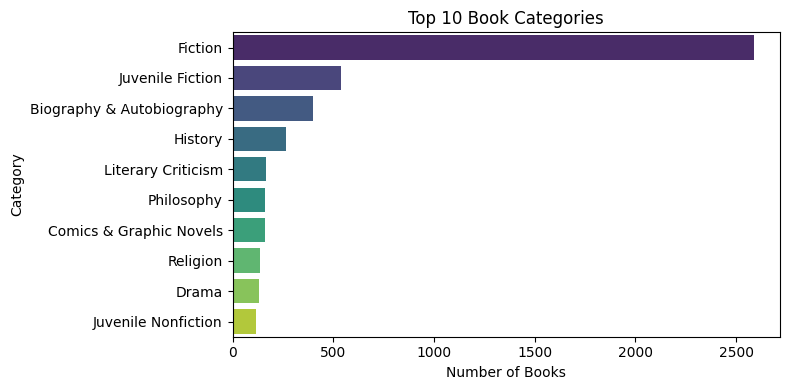



categories
Fiction                      2588
Juvenile Fiction              538
Biography & Autobiography     401
History                       264
Literary Criticism            166
Philosophy                    160
Comics & Graphic Novels       159
Religion                      137
Drama                         132
Juvenile Nonfiction           116
Name: count, dtype: int64


In [51]:
# Menghitung jumlah data pada kolom 'categories'
category_counts = df['categories'].value_counts()

# Memilih top 10 terbanyak berdasarkan kategori
top_10_categories = category_counts.head(10)

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')
plt.title('Top 10 Book Categories')
plt.xlabel('Number of Books')
plt.ylabel('Category')
plt.tight_layout()
plt.show()
print('\n')
print(category_counts[:10])

**Insight:**
- Kategori buku yang paling banyak adalah fiksi sejumlah 2588. Jumlah ini, 3x lipat dari kategori terbanyak kedua yaitu Juvenile Fiction.
- Ini artinya kategori fiksi lebih banyak penggemarnya daripada kategori buku lain.


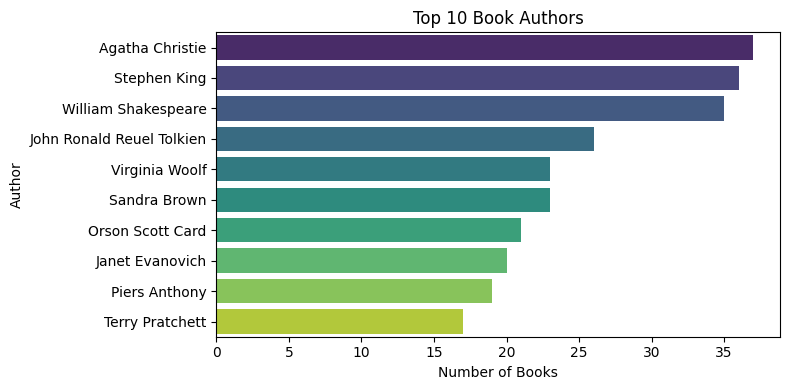



authors
Agatha Christie              37
Stephen King                 36
William Shakespeare          35
John Ronald Reuel Tolkien    26
Virginia Woolf               23
Sandra Brown                 23
Orson Scott Card             21
Janet Evanovich              20
Piers Anthony                19
Terry Pratchett              17
Name: count, dtype: int64


In [50]:
# Menghitung jumlah data pada kolom 'authors'
author_counts = df['authors'].value_counts()

# Memilih top 10 terbanyak berdasarkan author
top_10_authors = author_counts.head(10)

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10_authors.values, y=top_10_authors.index, palette='viridis')
plt.title('Top 10 Book Authors')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.tight_layout()
plt.show()
print('\n')
print(author_counts[:10])

**Insight:**
- Agatha Christe menulis buku terbanyak dengan jumlah 37 buku.
- Stephen King dan William Shakespeare pada urutan kedua (36 buku) dan ketiga (35 buku)

Top 10 Authors by Total Number of Pages:


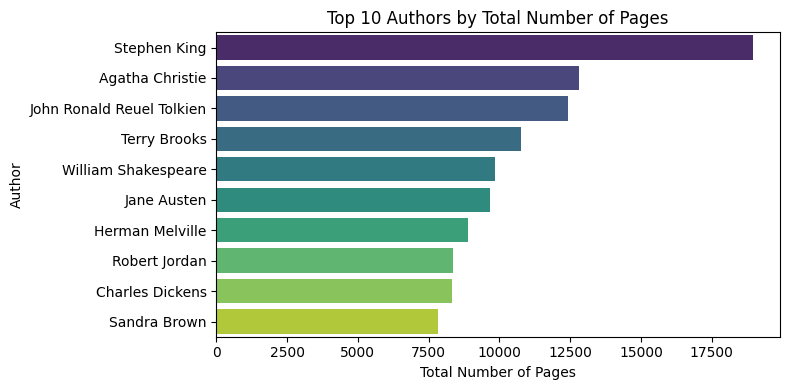



authors
Stephen King                 18967.0
Agatha Christie              12803.0
John Ronald Reuel Tolkien    12424.0
Terry Brooks                 10768.0
William Shakespeare           9836.0
Jane Austen                   9679.0
Herman Melville               8876.0
Robert Jordan                 8366.0
Charles Dickens               8318.0
Sandra Brown                  7815.0
Name: num_pages, dtype: float64


In [53]:
# Groupby author dan num_pages
author_pages = df.groupby('authors')['num_pages'].sum()

# Top 10
top_10_author_pages = author_pages.sort_values(ascending=False).head(10)
print("Top 10 Authors by Total Number of Pages:")

# Bar plot author dengan total num_pages terbanyak
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10_author_pages.values, y=top_10_author_pages.index, palette='viridis')
plt.title('Top 10 Authors by Total Number of Pages')
plt.xlabel('Total Number of Pages')
plt.ylabel('Author')
plt.tight_layout()
plt.show()
print('\n')
print(top_10_author_pages)

**Insight:**
- Stephen King menuliskan sebanyak 18967 halaman, membuatnya menduduki penulis nomer 1 dengan jumlah halaman terbanyak ditulis
- Agathe Christie nomer 2 dengan jumlah halaman  12803.
- John Ronald Reuel Tolkien nomer 3 dengan jumlah halaman 12424.

# Data Cleaning dan Preprocessing

## Feature Selection dan Null Handling

In [33]:
# Menggabungkan kolom
df['combined'] = (
    df['title'].fillna('') + ' ' +
    df['authors'].fillna('') + ' ' +
    df['categories'].fillna('') + ' '
)

# Menampilkan kolom 5 kolom combined
print(55*'=')
print('Data Kolom Combined:')
print(df['combined'].head())
print(55*'=')
print('Jumlah Null di Kolom Combined:')
print(df['combined'].isnull().sum())
print(55*'=')

Data Kolom Combined:
0                   Gilead Marilynne Robinson Fiction 
1    Spider's Web Charles Osborne;Agatha Christie D...
2    The One Tree Stephen R. Donaldson American fic...
3               Rage of angels Sidney Sheldon Fiction 
4    The Four Loves Clive Staples Lewis Christian l...
Name: combined, dtype: object
Jumlah Null di Kolom Combined:
0


**Insight:**
- Data null dapat mengakibatkan kegagalan dalam proses ektraksi fitur. Oleh karena itu, data null diganti dengan string kosong.
- Mengapa string kosong? Karena string kosong tidak bernilai apa-apa sehingga tidak akan mempengaruhi proses ekstraksi fitur.
- Kolom baru bernama 'combined' berhasil dibuat dengan menggabungkan kolom 'title', 'author', dan 'categories'.

# Sistem Rekomendasi

## Ektraksi Fitur dengan TF-IDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Stopwords kata-kata yang tidak memberi makna
tfidf = TfidfVectorizer(stop_words='english')

# Transformasi teks menjadi matriks vektor pada kolom combined
tfidf_matrix = tfidf.fit_transform(df['combined'])

# Ukuran Matrix TF-IDF
tfidf_matrix.shape

(6810, 10317)

**Insight:**
- Dimensi Matriks TF-IDF berukuran 6810 (baris) dan 10317 (kolom)

## Mendapatkan Rekomendasi dengan Cosine Similarity

### Menghitung Cosine Similarity

Nilai Cosine Similarity berkisar dari 0 hingga 1:
- 1: Menunjukkan vektor yang identik (sangat mirip).
- 0: Menunjukkan vektor yang ortogonal (tidak ada kemiripan sama sekali).
- Artinya, semakin mendekati angka 1 berarti semakin tinggi kemiripannya. Sedangkan semakin mendekati angka 0, berarti semakin rendah kemiripannya

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# Hitung cosine similarity antar buku
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.01557053, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.05383895],
       [0.01557053, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.05383895, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [43]:
cosine_sim.shape

(6810, 6810)

**Insight:**
- Dimensi Matriks Cosine Similarity berukuran 6810 (baris) dan 6810 (kolom)

### Mendapatkan Rekomendasi dengan Cosine Similarity

Flow Sistem Rekomendasi dengan Cosine Similarity:
- Dimulai dengan membuat Series bernama indices yang memetakan setiap judul buku (dalam lowercase) ke indeks barisnya dalam DataFrame df. Hal ini memungkinkan untuk melakukan pencarian cepat.

- Jika buku ditemukan, indeks numeriknya diambil dan digunakan untuk mengakses baris terkait dalam matriks cosine_sim. Sepuluh skor teratas akan dipilih, kecuali skor pertama karena mewakili buku itu sendiri.

- Fungsi kemudian membuat daftar recommendations yang berisi informasi title, author, dan average_rating buku-buku rekomendasi, serta menambahkan skor cosine_similarity ke masing-masing index.

In [44]:
# Buat index dari judul buku (lowercase)
indices = pd.Series(df.index, index=df['title'].str.lower()).drop_duplicates()

# Membuat fungsi untuk rekomendasi berdasarkan judul dan nilai cosine similarity
def recommend_books_with_similarity(title, cosine_sim=cosine_sim):
    title = title.lower() # Lowercase title
    if title not in indices:
        return f"Buku berjudul '{title}' tidak ditemukan dalam data."

    # Mendapatkan index numerik dari kolom title
    idx = indices[title]
    # Iterasi matrix cosine similarity
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Ambil 10 termirip (selain dirinya sendiri)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Membuat list baru
    recommendations = []
    # Looping utk mendapatkan data informasi buku dan nilai cosine similarity
    for i, score in sim_scores:
        book_info = df[['title', 'authors', 'average_rating']].iloc[i].to_dict()
        book_info['cosine_similarity_score'] = score
        # Menyimpan data ke dalam dict
        recommendations.append(book_info)

    return pd.DataFrame(recommendations)

In [45]:
# Mencoba sistem rekomendasi (cosine similarity) dengan memasukkan satu judul buku
recommend_books_with_similarity("Charade")

,title,authors,average_rating,cosine_similarity_score
0,Two Alone,Sandra Brown,3.70,0.696696
1,Three Complete Novels,Sandra Brown,4.21,0.544560
2,Where There's Smoke,Sandra Brown,3.96,0.520835
3,A Whole New Light,Sandra Brown,3.55,0.488171
4,Exclusive,Sandra Brown,3.96,0.485385
5,Ricochet,Sandra Brown,3.97,0.485385
6,Love Beyond Reason,Sandra Brown,3.64,0.472996
7,Adam's Fall,Sandra Brown,3.74,0.461233
8,Texas! Trilogy,Sandra Brown,4.28,0.446751
9,Heaven's Price,Sandra Brown,3.54,0.446658


**Insight:**
Dengan memasukkan judul 'Charade' karya 'Sandra Brown', dapat dilihat bahwa:
-  Kemiripan paling tinggi yaitu dengan 'Two Alone' yang memiliki cosine similarity sebesar 0.69
- Disusul 'Three Complete Novels' yang memiliki cosine similarity sebesar 0.54
- Angka semakin menurun dari atas ke bawah, yang artinya semakin ke bawah semakin tidak mirip.
- Dari top 10 buku yang direkomendasikan semuanya adalah karya 'Sandra Brown'.

## Mendapatkan Rekomendasi dengan Euclidean Distance

## Menghitung Euclidean Distance

Euclidean Distance mengukur jarak garis lurus terpendek antara dua titik dalam satu ruang. Dari metrik ini dapat diketahui bahwa:
- Nilai minimumnya adalah 0.
- Nilai maksimum tidak pasti tergantung pada dimensi fitur.
- Artinya, semakin mendekati nilai 0, maka semakin tinggi kemiripan. Sedangkan semakin jauh dari angka 0, maka semakin rendah kemiripannya.

In [21]:
from sklearn.metrics.pairwise import euclidean_distances

# Hitung Euclidean Distance antar buku
euclidean_dist_matrix = euclidean_distances(tfidf_matrix, tfidf_matrix)
euclidean_dist_matrix

array([[0.        , 1.41421356, 1.40316034, ..., 1.41421356, 1.41421356,
        1.41421356],
       [1.41421356, 0.        , 1.41421356, ..., 1.41421356, 1.41421356,
        1.37561699],
       [1.40316034, 1.41421356, 0.        , ..., 1.41421356, 1.41421356,
        1.41421356],
       ...,
       [1.41421356, 1.41421356, 1.41421356, ..., 0.        , 1.41421356,
        1.41421356],
       [1.41421356, 1.41421356, 1.41421356, ..., 1.41421356, 0.        ,
        1.41421356],
       [1.41421356, 1.37561699, 1.41421356, ..., 1.41421356, 1.41421356,
        0.        ]])

In [46]:
# Membuat fungsi untuk rekomendasi berdasarkan judul dan nilai euclidean distance
def recommend_books_euclidean_with_distance(title, euclidean_dist=euclidean_dist_matrix):
    title = title.lower() # Lowercase title
    if title not in indices:
        return f"Buku berjudul '{title}' tidak ditemukan dalam data."

    # Mendapatkan index numerik dari kolom title
    idx = indices[title]
    # Iterasi matrix euclidean distance
    dist_scores = list(enumerate(euclidean_dist[idx]))
    # Ambil 10 terdekat (selain dirinya sendiri)
    distance_scores = sorted(dist_scores, key=lambda x: x[1])[1:11]

    # Membuat list baru
    recommendations = []
    # Looping utk mendapatkan data informasi buku dan nilai cosine similarity
    for i, distance in distance_scores:
        book_info = df[['title', 'authors', 'average_rating']].iloc[i].to_dict()
        book_info['distance'] = distance
        # Menyimpan data ke dalam dict
        recommendations.append(book_info)

    return pd.DataFrame(recommendations)

### Mendapatkan Rekomendasi dengan Euclidean Distance

Flow Sistem Rekomendasi dengan Euclidean Distance:
- Dimulai dengan mendefinisikan fungsi recommend_books_euclidean_with_distance yang menerima judul buku dan matriks Euclidean Distance. Judul diubah ke huruf kecil dan dicek keberadaannya dalam indices. Hal ini akan melakukan pencarian cepat.
- Jika ditemukan, indeks buku digunakan untuk mengambil skor Euclidean Distance dari matriks, yang kemudian diubah menjadi daftar tuple dan diurutkan dari jarak terkecil ke terbesar. Sepuluh skor teratas dipilih, mengabaikan skor pertama yang bernilai nol.

In [47]:
# Mencoba sistem rekomendasi (euclidean distance) dengan memasukkan satu judul buku
recommend_books_euclidean_with_distance("Charade")

,title,authors,average_rating,distance
0,Two Alone,Sandra Brown,3.70,0.778851
1,Three Complete Novels,Sandra Brown,4.21,0.954400
2,Where There's Smoke,Sandra Brown,3.96,0.978944
3,A Whole New Light,Sandra Brown,3.55,1.011759
4,Exclusive,Sandra Brown,3.96,1.014510
5,Ricochet,Sandra Brown,3.97,1.014510
6,Love Beyond Reason,Sandra Brown,3.64,1.026649
7,Adam's Fall,Sandra Brown,3.74,1.038043
8,Texas! Trilogy,Sandra Brown,4.28,1.051902
9,Heaven's Price,Sandra Brown,3.54,1.051991


**Insight:**
Dengan memasukkan judul 'Charade' karya 'Sandra Brown', dapat dilihat bahwa:
-  Jarak paling dekat yaitu dengan 'Two Alone' yang memiliki euclidean distance sebesar 0.77
- Disusul 'Three Complete Novels' yang memiliki euclidean distance sebesar 0.95
- Angka distance semakin naik dari atas ke bawah, yang artinya semakin ke bawah semakin tidak mirip.
- Dari top 10 buku yang direkomendasikan semuanya adalah karya 'Sandra Brown'.

**Kesimpulan:**
- Dari hasil percobaan dengan judul buku yang sama, yaitu menggunakan cosine similarity dan euclidean distance, keduanya memberikan rekomendasi buku yang sama.
- Dengan metode cosine similarity, nilai tertinggi yaitu 0.69
- Dengan metode euclidean distance, jarak terdekat yaitu 0.77